In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Patient.csv')
df.head(10)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Male,0,95,chest pain or pressure,headache,fever,Moderate,Covid
1,31/01/20,6:00 PM,Kerala,1,Male,0,99,difficulty breathing or shortness of breath,"a rash on skin, or discolouration of fingers o...",tiredness,Mild,Covid
2,1/2/2020,6:00 PM,Kerala,2,Male,0,91,difficulty breathing or shortness of breath,aches and pains,fever,Moderate,Covid
3,2/2/2020,6:00 PM,Kerala,3,Female,0,76,loss of speech or movement,sore throat,dry cough,Moderate,Covid
4,3/2/2020,6:00 PM,Kerala,3,Female,0,17,loss of speech or movement,loss of taste or smell,tiredness,Severe,Covid
5,4/2/2020,6:00 PM,Kerala,3,Male,0,83,chest pain or pressure,loss of taste or smell,tiredness,Moderate,flu
6,5/2/2020,6:00 PM,Kerala,3,Female,0,72,difficulty breathing or shortness of breath,diarrhoea,tiredness,Severe,flu
7,6/2/2020,6:00 PM,Kerala,3,Male,0,92,loss of speech or movement,"a rash on skin, or discolouration of fingers o...",tiredness,Severe,flu
8,7/2/2020,6:00 PM,Kerala,3,Female,0,16,loss of speech or movement,sore throat,fever,Mild,flu
9,8/2/2020,6:00 PM,Kerala,3,Male,0,57,difficulty breathing or shortness of breath,headache,tiredness,Moderate,flu


In [3]:
df.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'Gender ', 'ConfirmedForeignNational', 'Age ', 'Serious symptoms',
       'Less common symptoms', 'Most common symptoms', 'Severity',
       'Patient_Status '],
      dtype='object')

In [4]:
df['Serious symptoms'].replace(to_replace=df['Serious symptoms'].unique(),value=list(range(0,len(df['Serious symptoms'].unique()))),inplace=True)

In [5]:
df

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Male,0,95,0,headache,fever,Moderate,Covid
1,31/01/20,6:00 PM,Kerala,1,Male,0,99,1,"a rash on skin, or discolouration of fingers o...",tiredness,Mild,Covid
2,1/2/2020,6:00 PM,Kerala,2,Male,0,91,1,aches and pains,fever,Moderate,Covid
3,2/2/2020,6:00 PM,Kerala,3,Female,0,76,2,sore throat,dry cough,Moderate,Covid
4,3/2/2020,6:00 PM,Kerala,3,Female,0,17,2,loss of taste or smell,tiredness,Severe,Covid
...,...,...,...,...,...,...,...,...,...,...,...,...
3130,17/06/20,8:00 AM,Tripura,-,Female,-,44,0,sore throat,tiredness,Mild,Covid
3131,17/06/20,8:00 AM,Uttarakhand,-,Female,-,35,1,conjunctivitis,dry cough,Severe,flu
3132,17/06/20,8:00 AM,Uttar Pradesh,-,Female,-,11,0,sore throat,fever,Mild,flu
3133,17/06/20,8:00 AM,West Bengal,-,Male,-,73,2,diarrhoea,fever,Mild,flu


In [6]:
df['Less common symptoms'].replace(to_replace=df['Less common symptoms'].unique(),value=list(range(0,len(df['Less common symptoms'].unique()))),inplace=True)
df['Most common symptoms'].replace(to_replace=df[ 'Most common symptoms'].unique(),value=list(range(0,len(df['Most common symptoms'].unique()))),inplace=True)
df['Severity'].replace(to_replace=df['Severity'].unique(),value=list(range(0,len(df['Severity'].unique()))),inplace=True)
df['Patient_Status '].replace(to_replace=df['Patient_Status '].unique(),value=list(range(0,len(df['Patient_Status '].unique()))),inplace=True)

In [7]:
df

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Male,0,95,0,0,0,0,0
1,31/01/20,6:00 PM,Kerala,1,Male,0,99,1,1,1,1,0
2,1/2/2020,6:00 PM,Kerala,2,Male,0,91,1,2,0,0,0
3,2/2/2020,6:00 PM,Kerala,3,Female,0,76,2,3,2,0,0
4,3/2/2020,6:00 PM,Kerala,3,Female,0,17,2,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3130,17/06/20,8:00 AM,Tripura,-,Female,-,44,0,3,1,1,0
3131,17/06/20,8:00 AM,Uttarakhand,-,Female,-,35,1,6,2,2,1
3132,17/06/20,8:00 AM,Uttar Pradesh,-,Female,-,11,0,3,0,1,1
3133,17/06/20,8:00 AM,West Bengal,-,Male,-,73,2,5,0,1,1


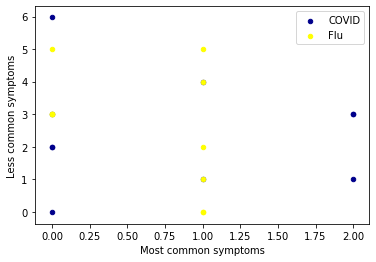

In [8]:
ax = df[df['Patient_Status '] == 0][0:10].plot(kind='scatter', x='Most common symptoms', y='Less common symptoms', color='DarkBlue', label='COVID');
df[df['Patient_Status '] == 1][0:10].plot(kind='scatter', x='Most common symptoms', y='Less common symptoms', color='Yellow', label='Flu', ax=ax);
plt.show()

In [9]:
df.dtypes

Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
Gender                      object
ConfirmedForeignNational    object
Age                          int64
Serious symptoms             int64
Less common symptoms         int64
Most common symptoms         int64
Severity                     int64
Patient_Status               int64
dtype: object

In [10]:
df.drop(df.columns[:3],1)

,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,1,Male,0,95,0,0,0,0,0
1,1,Male,0,99,1,1,1,1,0
2,2,Male,0,91,1,2,0,0,0
3,3,Female,0,76,2,3,2,0,0
4,3,Female,0,17,2,4,1,2,0
...,...,...,...,...,...,...,...,...,...
3130,-,Female,-,44,0,3,1,1,0
3131,-,Female,-,35,1,6,2,2,1
3132,-,Female,-,11,0,3,0,1,1
3133,-,Male,-,73,2,5,0,1,1


In [11]:
df['ConfirmedIndianNational'].notnull()

0       True
1       True
2       True
3       True
4       True
        ... 
3130    True
3131    True
3132    True
3133    True
3134    True
Name: ConfirmedIndianNational, Length: 3135, dtype: bool

In [12]:
df = df[pd.to_numeric(df['ConfirmedIndianNational'], errors='coerce').notnull()]  
df['ConfirmedIndianNational'] = df['ConfirmedIndianNational'].astype('int')
df.dtypes

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational      int32
Gender                      object
ConfirmedForeignNational    object
Age                          int64
Serious symptoms             int64
Less common symptoms         int64
Most common symptoms         int64
Severity                     int64
Patient_Status               int64
dtype: object

In [13]:
df['ConfirmedForeignNational'].notnull()

0      True
1      True
2      True
3      True
4      True
       ... 
441    True
442    True
443    True
444    True
445    True
Name: ConfirmedForeignNational, Length: 446, dtype: bool

In [14]:
df = df[pd.to_numeric(df['ConfirmedForeignNational'], errors='coerce').notnull()]  
df['ConfirmedForeignNational'] = df['ConfirmedForeignNational'].astype('int')      
df.dtypes

Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational      int32
Gender                      object
ConfirmedForeignNational     int32
Age                          int64
Serious symptoms             int64
Less common symptoms         int64
Most common symptoms         int64
Severity                     int64
Patient_Status               int64
dtype: object

In [15]:
df.notnull()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
441,True,True,True,True,True,True,True,True,True,True,True,True
442,True,True,True,True,True,True,True,True,True,True,True,True
443,True,True,True,True,True,True,True,True,True,True,True,True
444,True,True,True,True,True,True,True,True,True,True,True,True


In [16]:
df.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'Gender ', 'ConfirmedForeignNational', 'Age ', 'Serious symptoms',
       'Less common symptoms', 'Most common symptoms', 'Severity',
       'Patient_Status '],
      dtype='object')

In [17]:
feature_df = df[['Age ','Less common symptoms', 'Most common symptoms', 'Severity',]]
X = np.asarray(feature_df)  
X[0:5]

array([[95,  0,  0,  0],
       [99,  1,  1,  1],
       [91,  2,  0,  0],
       [76,  3,  2,  0],
       [17,  4,  1,  2]], dtype=int64)

In [18]:
df['Patient_Status '] = df['Patient_Status '].astype('int') 
y = np.asarray(df['Patient_Status '])
y [0:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.72)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (124, 4) (124,)
Test set: (322, 4) (322,)


In [20]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
yhat = clf.predict(X_test)
yhat [0:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [22]:
y_test[0:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [23]:
yhat [0:10]==y_test[0:10]

array([False,  True, False,  True, False, False,  True, False,  True,
        True])

In [24]:
yhat [0:len(yhat)]==y_test[0:len(y_test)]

array([False,  True, False,  True, False, False,  True, False,  True,
        True, False,  True, False, False,  True, False, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
        True,  True,

In [25]:
from sklearn.metrics import f1_score
f1_score=f1_score(y_test, yhat,average='weighted') 
f1_score

0.5106370723627369

In [26]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.5248447204968945

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.53      0.69      0.60       167
           1       0.51      0.35      0.41       155

    accuracy                           0.52       322
   macro avg       0.52      0.52      0.51       322
weighted avg       0.52      0.52      0.51       322



In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  # explained in the end

Confusion matrix
[[115  52]
 [101  54]]
Confusion matrix, without normalization
[[115  52]
 [101  54]]


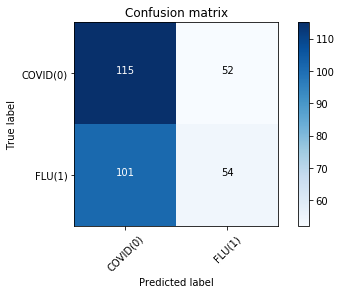

In [30]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print("Confusion matrix")
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COVID(0)','FLU(1)'],title='Confusion matrix')

plt.show()

In [1]:
def covid():
    if (((Input2>=60) or (Input2<=10) or (Input=='Y')) & ((Input13=='Y') or (Input14=='Y') or
                                                          (Input15=='Y')) & (Input3=='Y') & (Input4=='Y') & (Input5=='Y')):
        print("As you come in the category of critical age group or have travelled recently or have serious symptoms, Rush to doctor!")
    elif((Input3=='Y') &(Input4=='Y') &(Input5=='Y')):
        print("You have common symptoms. It can be COVID or flu. Take care!")
    elif((Input6=='Y') & (Input7=='Y') & (Input8=='Y') & (Input9=='Y') & (Input10=='Y') & (Input11=='Y') & (Input12=='Y')):
        print("You have mild symptoms. Home quarantine is advised.")
    else:
        print("NEXT")
        

In [ ]:
for i in range(1,3):
    print("Patient No :{}".format(i))
    Input1=input("Enter your name:")
    Input2=int(input("Enter your age:"))
    Input=input("Have you travelled from abroad recently? (Y/N)")
    Input3=input("Do you have fever? (Y/N)")
    Input4=input("Do you have dry cough? (Y/N)")
    Input5=input("Do you have tiredness? (Y/N)")
    Input6=input("Do you have aches and pains in any part of the body? (Y/N)")
    Input7=input("Are you having sore throat (Y/N)")
    Input8=input("Are you suffering from diarrhoea? (Y/N)")
    Input9=input("Do you have conjunctivitis (Y/N)")
    Input10=input("Are you having continuous headache? (Y/N)")
    Input11=input("Are you suffering from the loss of taste or smell? (Y/N)")
    Input12=input("Are you having rashes anywhere on the skin? (Y/N)")
    Input13=input("Are you having difficulty in breathing? (Y/N)")
    Input14=input("Are you suffering from chest pain (Y/N)")
    Input15=input("Are you suffering from the loss of speech or movement (Y/N)")
    covid()

Patient No :1
Enter your name:ABC
Enter your age:34
Have you travelled from abroad recently? (Y/N)N
Do you have fever? (Y/N)Y
Do you have dry cough? (Y/N)Y
Do you have tiredness? (Y/N)N
Do you have aches and pains in any part of the body? (Y/N)Y
Are you having sore throat (Y/N)N
Are you suffering from diarrhoea? (Y/N)Y
Do you have conjunctivitis (Y/N)N
Are you having continuous headache? (Y/N)Y
Are you suffering from the loss of taste or smell? (Y/N)Y
Are you having rashes anywhere on the skin? (Y/N)Y
Are you having difficulty in breathing? (Y/N)Y
Are you suffering from chest pain (Y/N)N
Are you suffering from the loss of speech or movement (Y/N)Y
NEXT
Patient No :2
